<a href="https://colab.research.google.com/github/Starboy177/DataScience/blob/main/JasoHasiU3proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You need to submit a .ipynb file with the first four letters of one first name, the first four letters of one last name, and U3proj.

Ex.

A student named Avy Aguacate Avocado Palta will submit a file named "Avy_AvocU3proj.ipynb", since she normally just goes by Avy, and, when pressed, reports Avocado as her last name. The " _ " after "Avy" serves as the fourth "letter" in her first name.

Ex2.

Army Armadillo will submit a file named "ArmyArmaU2proj.ipynb"

True Average of Bukayo Saka's Match Rating for 23-34 season.

In [ ]:
!pip install "preliz[full,notebook]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 514.2/514.2 kB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: nbclient
    Found existing installation: nbclient 0.10.1
    Uninstalling nbclient-0.10.1:
      Successfully uninstalled nbclient-0.10.1


In [ ]:
import preliz as pz

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az
import pymc as pm

I am going to determine the true average for Bukayo Saka's match rating per game using his his ratings from the 23-24 premier league season.

Stats such as goals, assists, chances created, or key passes can boost a player's rating, but generally a player's match rating is a measure of how well that individual player performed in a match.

Below is an array of Bukayo Saka's match ratings from each Premier League match in the 2023-2024 season. There are 35 data points, which will be used as a likelihood to create a posterior.

In [ ]:
data_ppg = [
    7.4,
    7.9,
    8.2,
    7.9,
    7.9,
    7.7,
    7.8,
    6.5,
    7.6,
    7.9,
    8.1,
    8.4,
    9.7,
    7.2,
    8.2,
    7.7,
    6.8,
    7.2,
    6.8,
    8.1,
    7.3,
    7.6,
    8.2,
    7.9,
    7.9,
    7.2,
    7.4,
    7.7,
    7.3,
    8.4,
    7.4,
    7.4,
    7.5,
    7.8,
    8.2,
]

(array([3., 0., 9., 6., 8., 8., 0., 0., 0., 1.]),
 array([6.5 , 6.82, 7.14, 7.46, 7.78, 8.1 , 8.42, 8.74, 9.06, 9.38, 9.7 ]),
 <BarContainer object of 10 artists>)

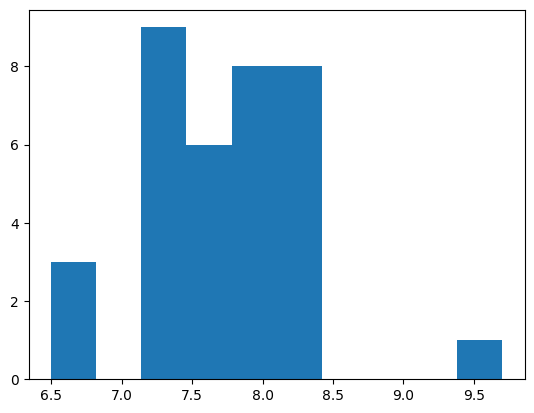

In [ ]:
plt.hist(data_ppg)

For my prior, I used a Normal distribution for the mean and a Half Normal distribution for the standard deviation. I used a Half Normal distribution because it only uses positive values and it is simple.

In [ ]:
#Normal Model
with pm.Model() as model_ppgN:
    #this distribution is centered at 8 with a variation of .5
    #as an estimate of the likelihood data
    μ = pm.Normal('μ', mu=8, sigma=.5)

    σ = pm.HalfNormal('σ', sigma=.5)

    #creates 2 priors of mu and sigma
    Y = pm.Normal('Y', mu = μ, sigma = σ, observed=data_ppg)
    idata_ppgN = pm.sample()

Output()

Output()

array([<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'σ'}>],
      dtype=object)

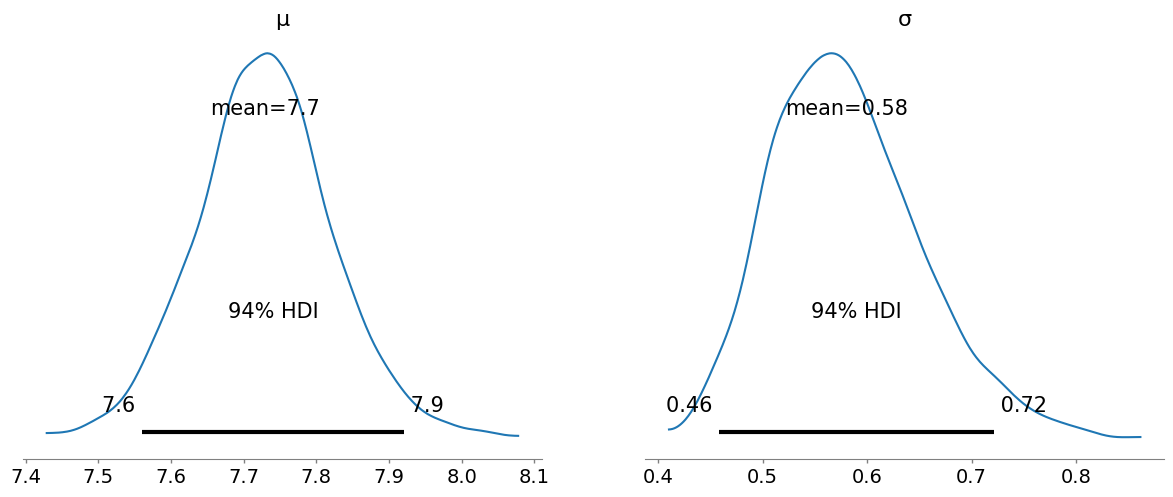

In [ ]:
az.plot_posterior(idata_ppgN)

In [ ]:
pm.sample_posterior_predictive(idata_ppgN, model=model_ppgN, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y'>

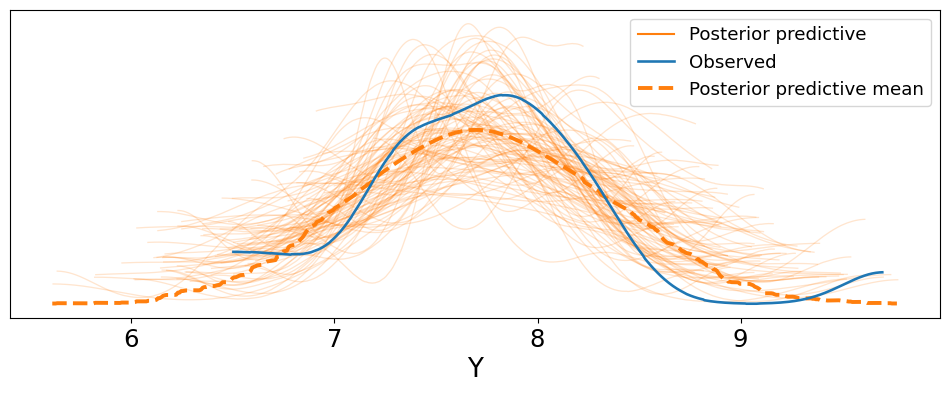

In [ ]:
#Plots the posterior predictive density overlaid with a smoothed version of the data

az.plot_ppc(idata_ppgN, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

The observed data has a similar shape to the posterior predictive mean, but the model does not fit perfectly. I think this is because the match ratings are concentrated around 7-8, and the Normal model does not accomodate for that. I decided to use a Truanced normal model because I can restrict the range to 1-10, since the highest match rating value is 10, and a Truanced Normal model will be more flexible for handling skewed data.

In [ ]:
data_ppg = [max(0, min(10, x)) for x in data_ppg]

# Define the Truncated Normal model
with pm.Model() as model_ppgTN:
    # Priors for the mean and standard deviation
    mu = pm.Normal('mu', mu=7.5, sigma=1)
    sigma = pm.HalfNormal('sigma', sigma=1)

    # Likelihood using a truncated normal distribution
    Y = pm.TruncatedNormal('Y', mu=mu, sigma=sigma, lower=0, upper=10, observed=data_ppg)

    # Sampling from the posterior
    idata_ppgTN = pm.sample(return_inferencedata=True, target_accept=0.95)

Output()

Output()

array([<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'sigma'}>],
      dtype=object)

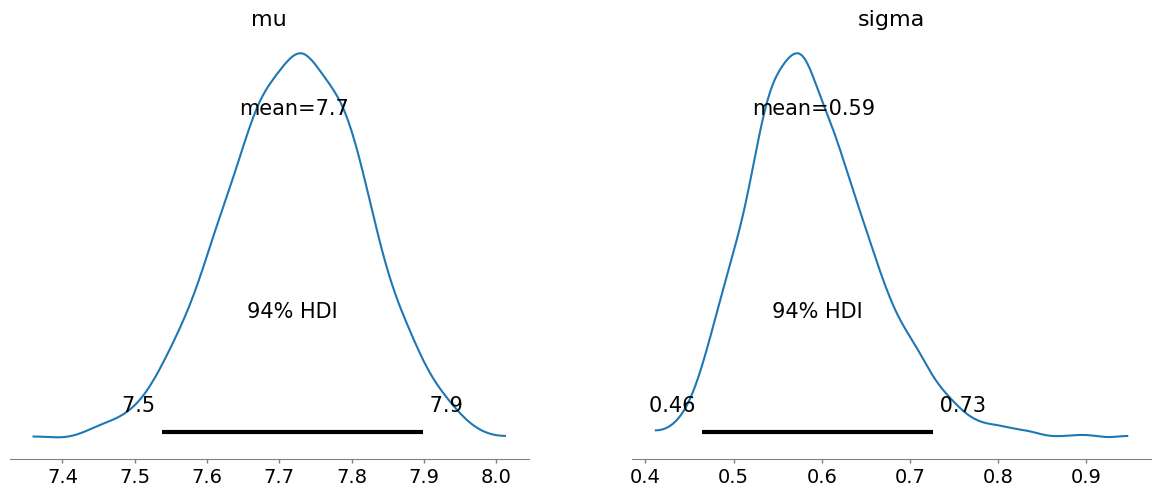

In [ ]:
az.plot_posterior(idata_ppgTN)

In [ ]:
pm.sample_posterior_predictive(idata_ppgTN, model=model_ppgTN, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Y'>

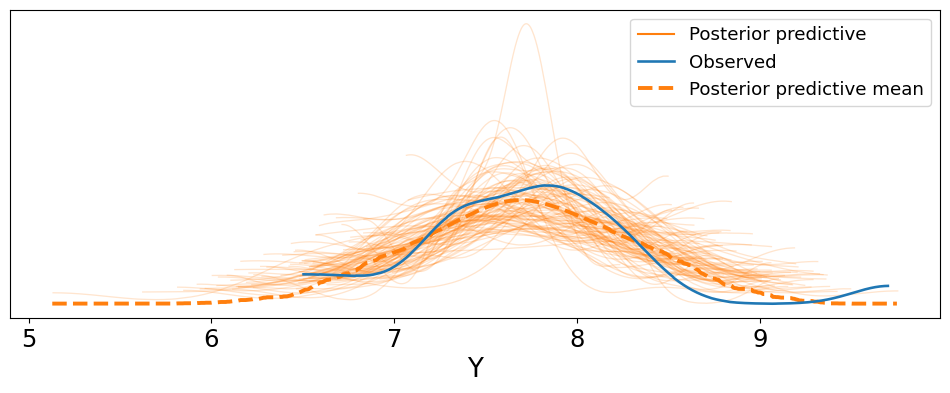

In [ ]:
az.plot_ppc(idata_ppgTN, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

The Truanced Normal model still has a a bit of a tail at the end, probably from one value being much higher than the rest, but there's not much we can do about that, and the Truanced Normal model fits better than the Normal model.